In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [100]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [101]:
# import the dataset 
df = pd.read_csv("sample_datasets/gurgaon_properties_cleaned_v2.csv")
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  floorNum      facing       agePossession  \
0        3         2       2       2.0         NaN        New Property   
1        2         2       2       4.0         NaN        New Property   
2        2         2       1       0.0         NaN  Under Construction   
3        2         2       1      17.0         NaN        New Property   
4        3         4      3+      10.0  North-West      Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               1081.0            NaN        650.0           0             0   
1                  NaN            NaN       1103.0           1             1   
2                  NaN            NaN      58141.0           0             0   
3                  NaN         1000.0        585.0           0             0   
4               1995.0         1615.0       1476.0           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0             8  
1           0           0       0                0            38  
2           0           0       0                0            15  
3           0           0       0                0            49  
4           0           0       1                1           174

In [102]:
# drop the duplicates 
df.drop_duplicates()

property_type                                            society  \
0             flat                            signature global park 4   
1             flat                                   smart world gems   
2             flat                                      pyramid elite   
3             flat                             breez global hill view   
4             flat                        bestech park view sanskruti   
5             flat                                     suncity avenue   
6             flat                                     paras quartier   
7             flat                             experion the heartsong   
8             flat                            adani m2k oyster grande   
9            house                                        independent   
10           house                                   dlf city phase 1   
11           house                                        independent   
12            flat                                   dlf regency park   
13            flat                                     ats tourmaline   
14            flat                   emaar mgf emerald floors premier   
15           house                                        independent   
16            flat                        bestech park view sanskruti   
17            flat                                        ss the leaf   
18            flat                             capital residences 360   
19           house                                        independent   
20            flat                                        ss the leaf   
21            flat                                afnhb jalvayu vihar   
22            flat                                      m3m woodshire   
23            flat                                     godrej habitat   
24            flat                         ansal api celebrity suites   
25           house                                        independent   
26           house                                        independent   
27            flat                                 chanderlok society   
28           house                                        independent   
29           house                international city by sobha phase 2   
30            flat                                    emaar digihomes   
31           house                                     uppal southend   
32            flat                                      vipul lavanya   
33            flat                                        m3m heights   
34            flat                           emaar mgf the palm drive   
35           house                                        greenopolis   
36            flat                                   dlf the skycourt   
37           house                                        independent   
38           house                                 emaar mgf marbella   
39           house                                 vipul tatvam villa   
40           house                international city by sobha phase 1   
41            flat                                     the arzoo cghs   
42            flat                                       corona optus   
43            flat                                         lotus homz   
44            flat                                         m3m merlin   
45           house                               housing board colony   
46            flat                             puri diplomatic greens   
47            flat                            la vida by tata housing   
48           house                          ganpati heights apartment   
49            flat                                smart world orchard   
50            flat                               tata gurgaon gateway   
51            flat                                       tulip violet   
52            flat                                   smart world gems   
53            flat                                 ireo the cor

In [103]:
# to check the null values in each column/feature
df.isna().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [104]:
df.shape

(3803, 23)

## Outlier Detection 

### price 

In [105]:
df["price"].isna().sum()

18

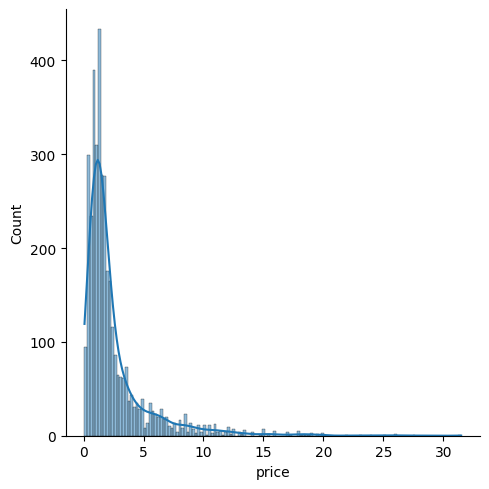

In [106]:
sns.displot(df["price"], kde=True);

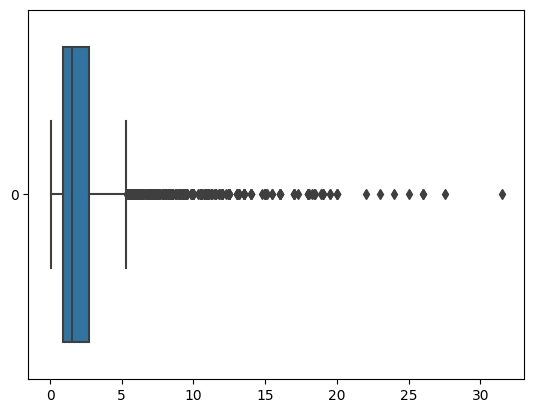

In [107]:
sns.boxplot(df["price"], orient="h");

In [108]:
# calculate first quantile or 25th percentile value
Q1 = df["price"].quantile(0.25)

# calculate third quantile of 75th percentile value
Q3 = df["price"].quantile(0.75)

# Calculate the IQR for the price column 
IQR = Q3 - Q1 

# Define bounds for outlier 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers 
outliers_price = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print("Number of outliers: ", outliers_price.shape[0])

# Getting some statistical information about the outliers in price column
outliers_price["price"].describe()

Number of outliers:  432


count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

### price_per_sqft

In [109]:
df["price_per_sqft"].isna().sum()

18

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\2109339869.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price_per_sqft"], kde=True);


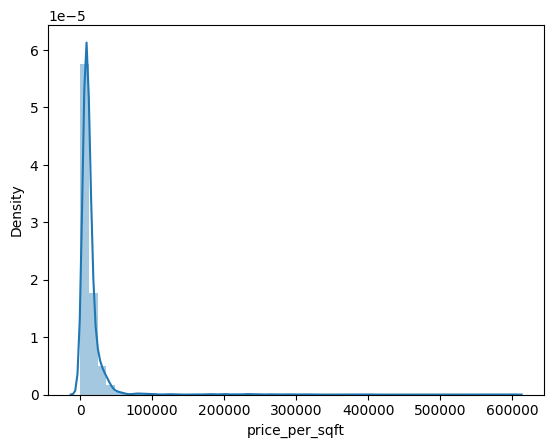

In [110]:
sns.distplot(df["price_per_sqft"], kde=True);

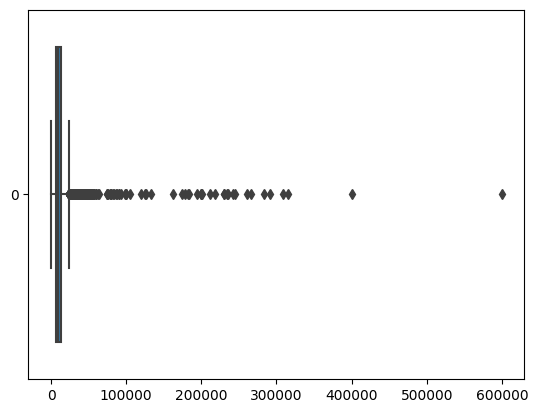

In [111]:
sns.boxplot(df["price_per_sqft"], orient="h");

In [112]:
# calculate first quantile or 25th percentile value
Q1 = df["price_per_sqft"].quantile(0.25)

# calculate third quantile of 75th percentile value
Q3 = df["price_per_sqft"].quantile(0.75)

# Calculate the IQR for the price column 
IQR = Q3 - Q1 

# Define bounds for outlier 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers 
outliers_sqft = df[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound)]

print("Number of outliers: ", outliers_sqft.shape[0])

# Getting some statistical information about the outliers in price column
outliers_sqft["price_per_sqft"].describe()

Number of outliers:  367


count       367.000000
mean      52115.435967
std       60746.225927
min       24202.000000
25%       27778.000000
50%       33333.000000
75%       41790.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

#### as some of the values in the area column are in square yards, so we have to convert these into sqft

In [113]:
outliers_sqft["area"] = outliers_sqft["area"].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\3268650499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft["area"] = outliers_sqft["area"].apply(lambda x:x*9 if x<1000 else x)


In [114]:
outliers_sqft[outliers_sqft["area"] < 1000].shape

(18, 23)

#### now calculate the price_per_sqft

In [115]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [116]:
outliers_sqft["price_per_sqft"]

10      33333.0
19      38194.0
25      27778.0
26      28283.0
39      38194.0
40      25103.0
45      30556.0
66      10101.0
74      38756.0
83      24926.0
90       5556.0
96      32253.0
114     37037.0
119     27741.0
127     38611.0
155      2778.0
156     26667.0
183     27778.0
229     13333.0
255     25562.0
293     26063.0
296     25111.0
303     28004.0
332      4630.0
336     13889.0
342     31430.0
343     28782.0
350     26235.0
354     27461.0
372     25000.0
386     55000.0
392     26000.0
397     24691.0
400     36111.0
412     38580.0
416     31481.0
430     29333.0
431     37037.0
441     26613.0
453     38095.0
478     38095.0
514     28490.0
523     25514.0
524      3292.0
526     40000.0
540     24455.0
543     24390.0
545     25543.0
550     31667.0
564     36883.0
565     24306.0
576      3681.0
606     33333.0
614     47167.0
626     26389.0
628     24500.0
642     28424.0
645     36667.0
646     26235.0
666      9619.0
671     55556.0
676     32407.0
677     

In [117]:
outliers_sqft["price_per_sqft"].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [118]:
# now update the original dataframe 
df.update(outliers_sqft)

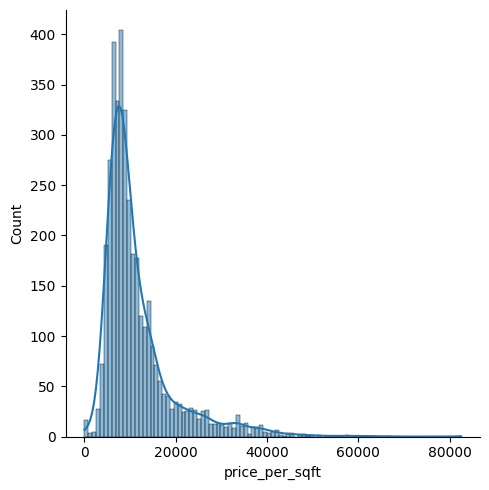

In [119]:
sns.displot(df["price_per_sqft"], kde=True);

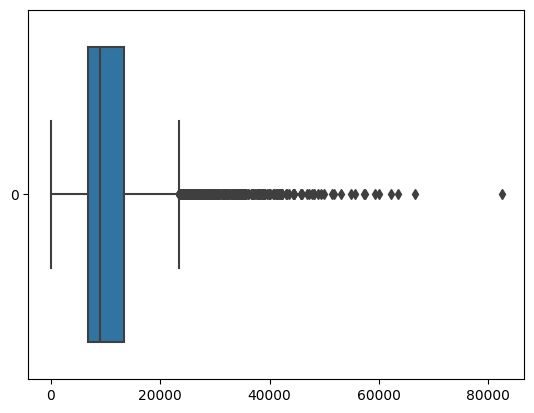

In [120]:
sns.boxplot(df["price_per_sqft"], orient="h");

In [121]:
df[df["price_per_sqft"] > 50000].shape

(13, 23)

In [122]:
# consider these rows as outliers and drop it 
df[df["price_per_sqft"] > 50000]

property_type                       society      sector  price  \
386          house            cloudnine cottages  sohna road   5.50   
671          house            emaar mgf marbella   sector 66  18.00   
1200         house                   independent   sector 26  14.75   
1261         house                   independent   sector 25  16.00   
1349          flat                unitech vistas   sector 70   9.00   
1425         house  project housing board colony   sector 31   8.00   
1640         house        emaar the palm springs   sector 54  14.00   
1839         house                unitech escape   sector 50  10.80   
2211         house                   independent   sector 26  26.00   
2290         house                  malibu towne   sector 47   8.50   
2488         house                dlf city plots   sector 26  26.00   
3046         house        emaar the palm springs   sector 54  24.00   
3285         house                           nul   sector 28  12.50   

      price_per_sqft    area  \
386          55000.0  1000.0   
671          55556.0  3240.0   
1200         51864.0  2844.0   
1261         59259.0  2700.0   
1349         57508.0  1565.0   
1425         63492.0  1260.0   
1640         62222.0  2250.0   
1839         60000.0  1800.0   
2211         82540.0  3150.0   
2290         53125.0  1600.0   
2488         57206.0  4545.0   
3046         66667.0  3600.0   
3285         51440.0  2430.0   

                                           areaWithType  bedRoom  bathroom  \
386                          Plot area 1000(92.9 sq.m.)      3.0       3.0   
671                         Plot area 360(301.01 sq.m.)      4.0       4.0   
1200                        Plot area 316(264.22 sq.m.)     16.0      20.0   
1261  Plot area 350(292.64 sq.m.)Built Up area: 325 ...     16.0      16.0   
1349                 Built Up area: 1565 (145.39 sq.m.)      3.0       3.0   
1425                  Built Up area: 140 (117.06 sq.m.)      2.0       1.0   
1640                        Plot area 250(209.03 sq.m.)      4.0       5.0   
1839  Plot area 290(242.48 sq.m.)Built Up area: 250 ...      4.0       4.0   
2211  Plot area 402(336.12 sq.m.)Built Up area: 400 ...     16.0      16.0   
2290                 Built Up area: 1600 (148.64 sq.m.)     12.0      12.0   
2488                        Plot area 505(422.24 sq.m.)      6.0       7.0   
3046                         Plot area 400(37.16 sq.m.)      5.0       5.0   
3285                        Plot area 270(225.75 sq.m.)     16.0      17.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
386        0       1.0         NaN  Moderately Old                  NaN   
671       3+       3.0        East  Moderately Old                  NaN   
1200      3+       4.0        East    New Property                  NaN   
1261      3+       4.0        West    New Property                  NaN   
1349       0       7.0         NaN       Undefined                  NaN   
1425       0       1.0         NaN       Undefined                  NaN   
1640      3+       2.0       North    Old Property                  NaN   
1839       3       2.0       North  Relatively New                  NaN   
2211      3+       4.0  North-West    New Property                  NaN   
2290      3+       4.0       North    New Property                  NaN   
2488      3+       2.0  North-East    New Property                  NaN   
3046       2       1.0  North-East    Old Property                  NaN   
3285      3+       4.0       South  Relatively New                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
386          1000.0          NaN         0.0           0.0         0.0   
671          3240.0          NaN         1.0           1.0         0.0   
1200         2844.0          NaN         1.0           1.0         1.0   
1261          325.0        300.0         1.0           1.0         1.0   
1349         1565.0          NaN         0.0   

In [123]:
df = df[df["price_per_sqft"] <= 50000]

### area

In [124]:
df["area"].isna().sum()

0

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\635281790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"], kde=True)


<Axes: xlabel='area', ylabel='Density'>

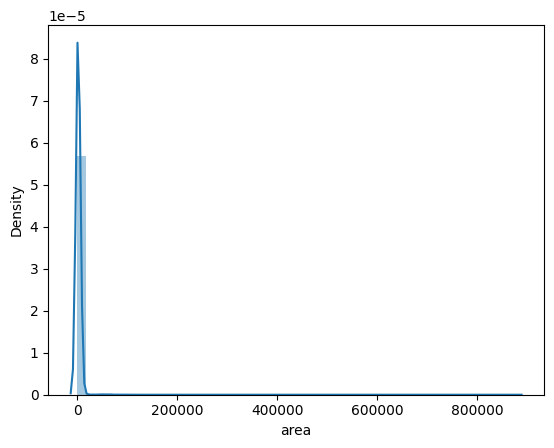

In [125]:
sns.distplot(df["area"], kde=True)

<Axes: >

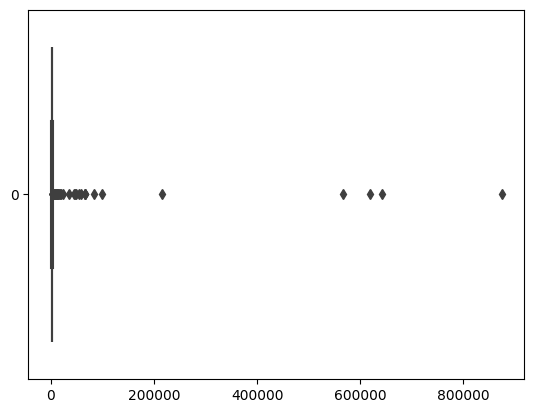

In [126]:
sns.boxplot(df["area"], orient="h")

In [127]:
df["area"].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: area, dtype: float64

In [128]:
df[df["area"] > 100000]

property_type                    society      sector  price  \
1638          flat  signature global solera 2  sector 107   0.51   
1648          flat          hcbs sports ville  sohna road   0.35   
2111          flat      signature the roselia   sector 95   0.45   
2651          flat            ramsons kshitij   sector 95   0.31   
3021         house                independent   sector 50   5.00   

      price_per_sqft      area                           areaWithType  \
1638             9.0  566667.0   Carpet area: 514396 (47788.95 sq.m.)   
1648             4.0  875000.0  Built Up area: 737147 (68483.2 sq.m.)   
2111             7.0  642857.0   Carpet area: 569243 (52884.41 sq.m.)   
2651             5.0  620000.0    Carpet area: 607936 (56479.1 sq.m.)   
3021           232.0  215517.0             Plot area 2(1011.71 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
1638      2.0       2.0       1       3.0       North    New Property   
1648      2.0       2.0       2       8.0         NaN  Relatively New   
2111      2.0       2.0       2       2.0  South-West    New Property   
2651      2.0       2.0       1       1.0  North-East  Relatively New   
3021      6.0       5.0      3+       2.0         NaN    New Property   

      super_built_up_area  built_up_area  carpet_area  study room  \
1638                  NaN            NaN     514396.0         0.0   
1648                  NaN       737147.0          NaN         0.0   
2111                  NaN            NaN     569243.0         0.0   
2651                  NaN            NaN     607936.0         1.0   
3021                  NaN            2.0          NaN         1.0   

      servant room  store room  pooja room  others  furnishing_type  \
1638           0.0         0.0         0.0     0.0              0.0   
1648           0.0         0.0         0.0     0.0              2.0   
2111           0.0         0.0         0.0     0.0              0.0   
2651           0.0         0.0         0.0     1.0              0.0   
3021           1.0         0.0         1.0     1.0              1.0   

      luxury_score  
1638          44.0  
1648          44.0  
2111          76.0  
2651          65.0  
3021           0.0

#### here, there is clearly a data error, as the price is very low as compare to the area so drop these rows 

In [129]:
df = df[df["area"] < 100000]

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\1549811541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"], kde=True);


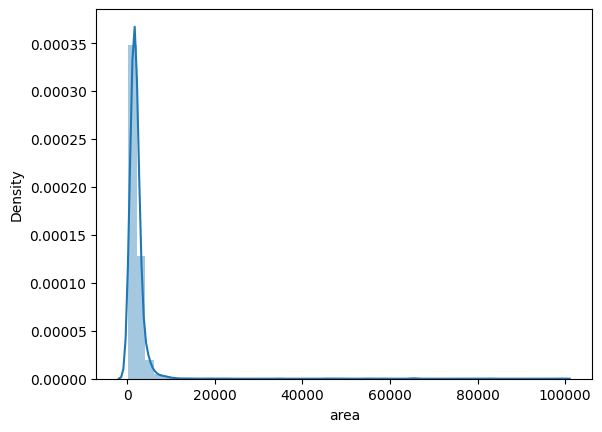

In [130]:
# now plot the displot and boxplot (here we are getting the slight improvement in the distribution)
sns.distplot(df["area"], kde=True);

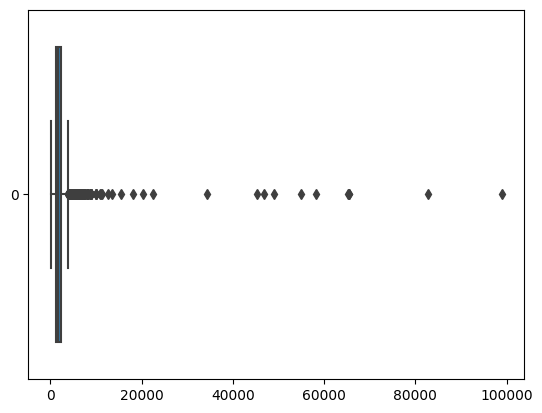

In [131]:
sns.boxplot(df["area"], orient="h");

In [132]:
df["area"].describe()

count     3767.000000
mean      2135.384922
std       3569.985096
min        145.000000
25%       1256.000000
50%       1744.000000
75%       2330.500000
max      98978.000000
Name: area, dtype: float64

#### now get the data with area greater than 10000 (as the 10000 is also a big number while considering area)

In [133]:
df[df["area"] > 10000]

property_type                    society      sector  price  \
2             flat              pyramid elite   sector 86   0.46   
48           house  ganpati heights apartment   sector 13   1.25   
115           flat      signature the serenas  sohna road   0.28   
300          house      dlf city plot phase 4   sector 28  13.00   
747          house                independent  sohna road   5.50   
818          house                independent   sector 26  18.40   
1123          flat                 rof ananda   sector 95   0.38   
1358         house                independent   sector 57   6.25   
1471         house                independent    sector 4   0.85   
1796          flat                 rof ananda   sector 95   0.38   
2131          flat                 godrej air   sector 85   2.50   
2342          flat             m3m golfestate   sector 65  13.20   
2356          flat                 rof ananda   sector 95   0.33   
2503          flat                 rof ananda   sector 95   0.21   
2666         house                independent   sector 25   7.30   
2834         house                independent   sector 43  27.50   
3088         house       unitech aspen greens   sector 50   6.95   
3195         house                independent   sector 43   5.50   
3444          flat                godrej icon  sector 88a   1.75   
3649          flat            ramsons kshitij   sector 95   0.24   

      price_per_sqft     area  \
2               79.0  58228.0   
48             151.0  82781.0   
115             57.0  49123.0   
300           1992.0  65261.0   
747           5093.0  10799.0   
818           1859.0  98978.0   
1123            58.0  65517.0   
1358          2778.0  22498.0   
1471           630.0  13492.0   
1796            58.0  65517.0   
2131          1379.0  18129.0   
2342         12000.0  11000.0   
2356            60.0  55000.0   
2503            61.0  34426.0   
2666          1560.0  46795.0   
2834         24366.0  11286.0   
3088          4490.0  15479.0   
3195          2716.0  20250.0   
3444          1384.0  12645.0   
3649            53.0  45283.0   

                                           areaWithType  bedRoom  bathroom  \
2                    Carpet area: 58141 (5401.48 sq.m.)      2.0       2.0   
48                         Plot area 115(7692.86 sq.m.)     10.0       6.0   
115                  Carpet area: 48811 (4534.69 sq.m.)      1.0       1.0   
300                   Carpet area: 7250 (6061.92 sq.m.)     10.0      10.0   
747   Plot area 1200(1003.35 sq.m.)Built Up area: 35...      3.0       3.0   
818   Plot area 502(419.74 sq.m.)Carpet area: 11000 ...      6.0       8.0   
1123                 Carpet area: 64412 (5984.07 sq.m.)      3.0       2.0   
1358  Plot area 3100(2591.99 sq.m.)Built Up area: 26...      9.0       9.0   
1471                      Plot area 1500(1254.19 sq.m.)      3.0       3.0   
1796                 Carpet area: 64529 (5994.94 sq.m.)      2.0       2.0   
2131                 Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0   
2342                 Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0   
2356                 Carpet area: 54917 (5101.96 sq.m.)      2.0       2.0   
2503                 Carpet area: 34401 (3195.96 sq.m.)      1.0       1.0   
2666  Plot area 215(179.77 sq.m.)Built Up area: 5800...      9.0       9.0   
2834                       Plot area 1254(1048.5 sq.m.)      6.0       7.0   
3088  Plot area 240(200.67 sq.m.)Built Up area: 2160...      3.0       3.0   
3195  Plot area 215(179.77 sq.m.)Built Up area: 2850...      8.0       7.0   
3444                               Carpet area: 1175.11      3.0       3.0   
3649                 Carpet area: 45966 (4270.38 sq.m.)      2.0       2.0   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
2          1       0.0         NaN  Under Construction                  NaN   
48         2       3.0  South-East        Old Property                  NaN   
115   

In [134]:
# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471
df.loc[[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471]]

property_type                society      sector  price  price_per_sqft  \
818          house            independent   sector 26  18.40          1859.0   
1796          flat             rof ananda   sector 95   0.38            58.0   
1123          flat             rof ananda   sector 95   0.38            58.0   
2             flat          pyramid elite   sector 86   0.46            79.0   
2356          flat             rof ananda   sector 95   0.33            60.0   
115           flat  signature the serenas  sohna road   0.28            57.0   
3649          flat        ramsons kshitij   sector 95   0.24            53.0   
2503          flat             rof ananda   sector 95   0.21            61.0   
1471         house            independent    sector 4   0.85           630.0   

         area                                       areaWithType  bedRoom  \
818   98978.0  Plot area 502(419.74 sq.m.)Carpet area: 11000 ...      6.0   
1796  65517.0                 Carpet area: 64529 (5994.94 sq.m.)      2.0   
1123  65517.0                 Carpet area: 64412 (5984.07 sq.m.)      3.0   
2     58228.0                 Carpet area: 58141 (5401.48 sq.m.)      2.0   
2356  55000.0                 Carpet area: 54917 (5101.96 sq.m.)      2.0   
115   49123.0                 Carpet area: 48811 (4534.69 sq.m.)      1.0   
3649  45283.0                 Carpet area: 45966 (4270.38 sq.m.)      2.0   
2503  34426.0                 Carpet area: 34401 (3195.96 sq.m.)      1.0   
1471  13492.0                      Plot area 1500(1254.19 sq.m.)      3.0   

      bathroom balcony  floorNum      facing       agePossession  \
818        8.0      3+       4.0       South      Relatively New   
1796       2.0       2      10.0        East        New Property   
1123       2.0       1      12.0       North      Relatively New   
2          2.0       1       0.0         NaN  Under Construction   
2356       2.0       1      13.0  South-West      Relatively New   
115        1.0       2       1.0  North-West      Relatively New   
3649       2.0       1      10.0  North-West      Relatively New   
2503       1.0       1      13.0       North      Relatively New   
1471       3.0       1       1.0       North      Relatively New   

      super_built_up_area  built_up_area  carpet_area  study room  \
818                   NaN            NaN      11000.0         0.0   
1796                  NaN            NaN      64529.0         1.0   
1123                  NaN            NaN      64412.0         0.0   
2                     NaN            NaN      58141.0         0.0   
2356                  NaN            NaN      54917.0         0.0   
115                   NaN            NaN      48811.0         1.0   
3649                  NaN            NaN      45966.0         0.0   
2503                  NaN            NaN      34401.0         0.0   
1471                  NaN        13500.0          NaN         0.0   

      servant room  store room  pooja room  others  furnishing_type  \
818            1.0         1.0         1.0     0.0              1.0   
1796           0.0         0.0         0.0     0.0              0.0   
1123           0.0         0.0         0.0     0.0              0.0   
2              0.0         0.0         0.0     0.0              0.0   
2356           0.0         0.0         0.0     0.0              0.0   
115            0.0         0.0         0.0     0.0              0.0   
3649           0.0         0.0         0.0     1.0              0.0   
2503           0.0         0.0         0.0     0.0              0.0   
1471           0.0         0.0         0.0     1.0              0.0   

      luxury_score  
818           60.0  
1796          15.0  
1123          51.0  
2             15.0  
2356          37.0  
115           37.0  
3649          33.0  
2503          68.0  
1471           0.0

In [135]:
# drop these rows 
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [136]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\3009328581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"], kde=True);


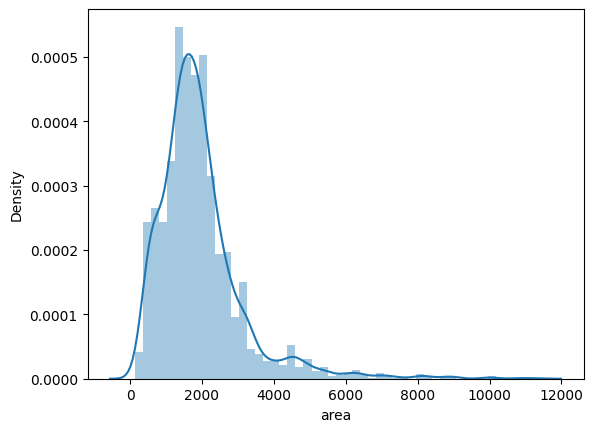

In [137]:
sns.distplot(df["area"], kde=True);

<Axes: >

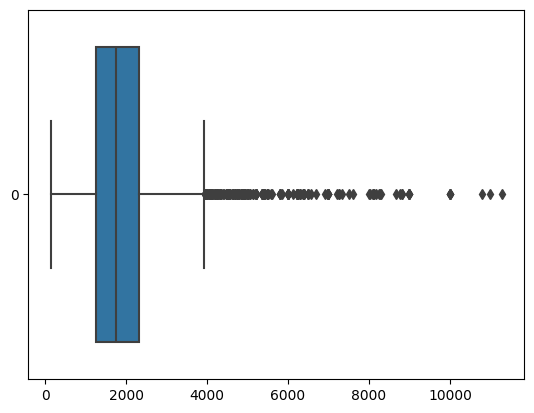

In [138]:
sns.boxplot(df["area"], orient="h")

In [139]:
df["area"].describe()

count     3758.000000
mean      1942.345663
std       1213.681158
min        145.000000
25%       1250.250000
50%       1742.500000
75%       2317.250000
max      11286.000000
Name: area, dtype: float64

### bedRoom 

In [140]:
df["bedRoom"].value_counts()

3.0     1541
2.0      982
4.0      672
5.0      201
1.0      128
6.0       71
9.0       40
8.0       30
7.0       28
12.0      26
10.0      20
16.0       7
13.0       4
18.0       2
19.0       2
11.0       1
20.0       1
14.0       1
21.0       1
Name: bedRoom, dtype: int64

In [141]:
df["bedRoom"].isna().sum()

0

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\4062673851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedRoom"], kde=True)


<Axes: xlabel='bedRoom', ylabel='Density'>

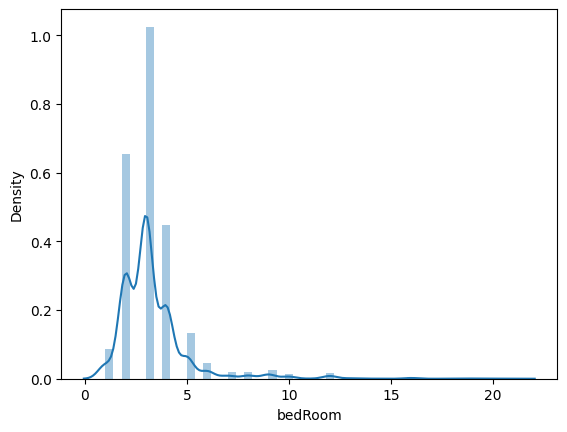

In [142]:
sns.distplot(df["bedRoom"], kde=True)

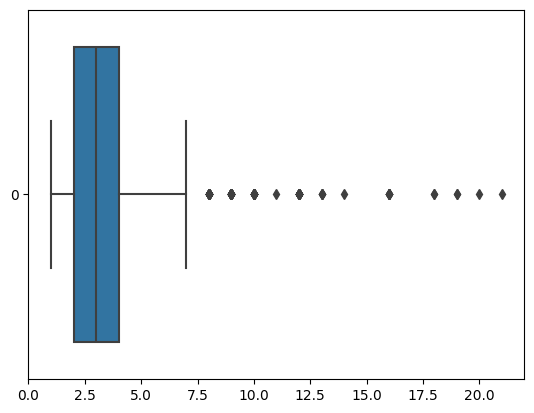

In [143]:
sns.boxplot(df["bedRoom"], orient="h");

In [144]:
df[df["bedRoom"] > 10].shape

(45, 23)

In [145]:
df = df[df["bedRoom"] <= 10]

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\4062673851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedRoom"], kde=True)


<Axes: xlabel='bedRoom', ylabel='Density'>

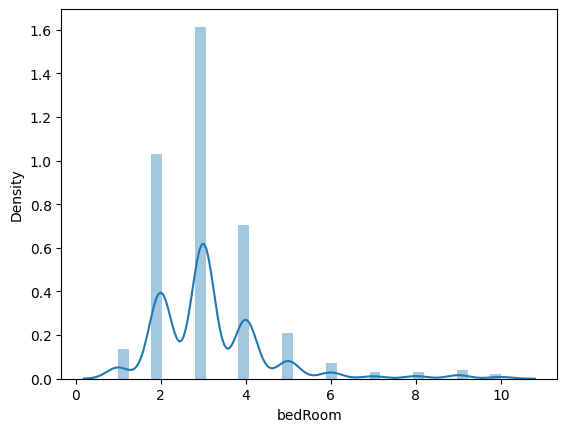

In [146]:
sns.distplot(df["bedRoom"], kde=True)

<Axes: >

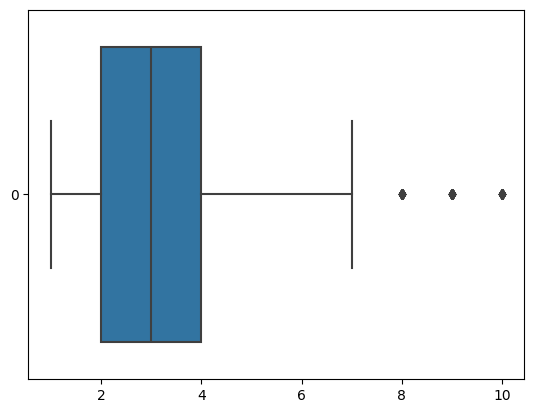

In [147]:
sns.boxplot(df["bedRoom"], orient="h")

In [148]:
df["bedRoom"].describe()

count    3713.000000
mean        3.186103
std         1.382854
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### bathroom

In [149]:
df["bathroom"].value_counts()

3.0     1108
2.0     1094
4.0      833
5.0      291
1.0      156
6.0      119
9.0       39
7.0       38
8.0       23
10.0       9
11.0       2
12.0       1
Name: bathroom, dtype: int64

In [150]:
df[df["bathroom"] > 10]

property_type               society     sector  price  price_per_sqft  \
2771         house           independent  sector 39   7.00         10000.0   
2816         house           independent  sector 24  11.00         28902.0   
3267         house  adani brahma samsara  sector 60  18.02         28200.0   

        area                                       areaWithType  bedRoom  \
2771  7000.0  Plot area 350(32.52 sq.m.)Built Up area: 7000 ...     10.0   
2816  3806.0  Plot area 3806.45(353.63 sq.m.)Built Up area: ...      8.0   
3267  6390.0                 Built Up area: 6390 (593.65 sq.m.)      9.0   

      bathroom balcony  floorNum      facing   agePossession  \
2771      11.0      3+       4.0  South-East  Relatively New   
2816      11.0      3+       3.0        East    Old Property   
3267      12.0      3+       3.0  North-East  Relatively New   

      super_built_up_area  built_up_area  carpet_area  study room  \
2771                  NaN         7000.0          NaN         0.0   
2816                  NaN         5000.0          NaN         1.0   
3267                  NaN         6390.0          NaN         0.0   

      servant room  store room  pooja room  others  furnishing_type  \
2771           0.0         0.0         1.0     0.0              2.0   
2816           1.0         0.0         1.0     1.0              1.0   
3267           1.0         0.0         0.0     0.0              1.0   

      luxury_score  
2771          38.0  
2816          39.0  
3267         146.0

### super_built_up_area

In [151]:
df["super_built_up_area"].isna().sum()

1798

In [152]:
df["super_built_up_area"].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\1771615301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["super_built_up_area"])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

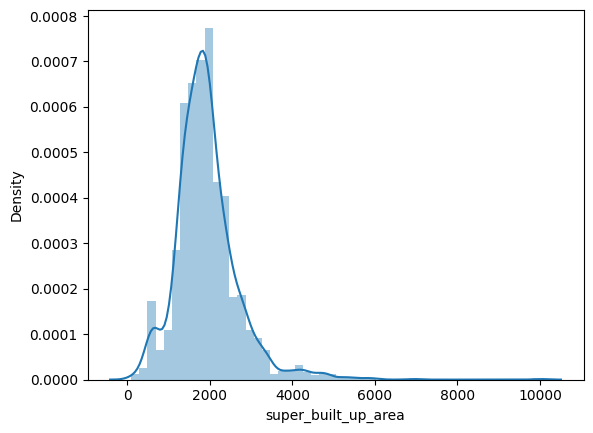

In [153]:
sns.distplot(df["super_built_up_area"])

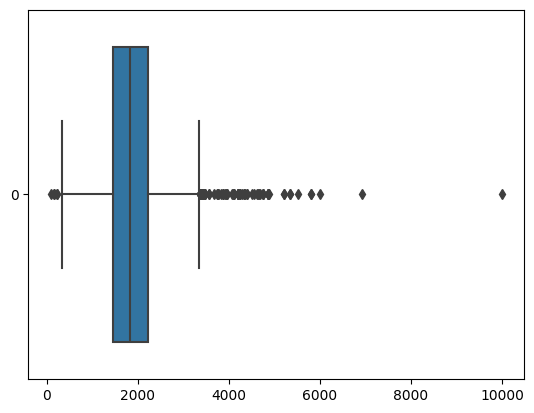

In [154]:
sns.boxplot(df["super_built_up_area"], orient='h');

### built_up_area

In [155]:
df["built_up_area"].isna().sum()

2058

In [156]:
df["built_up_area"].describe()

count     1655.000000
mean      1930.160344
std       1386.793901
min         14.000000
25%       1120.000000
50%       1650.000000
75%       2367.000000
max      11286.000000
Name: built_up_area, dtype: float64

In [157]:
df[df["built_up_area"] > 10000]

property_type      society     sector  price  price_per_sqft     area  \
2834         house  independent  sector 43   27.5         24366.0  11286.0   

                      areaWithType  bedRoom  bathroom balcony  floorNum  \
2834  Plot area 1254(1048.5 sq.m.)      6.0       7.0      3+       3.0   

          facing   agePossession  super_built_up_area  built_up_area  \
2834  North-East  Relatively New                  NaN        11286.0   

      carpet_area  study room  servant room  store room  pooja room  others  \
2834          NaN         1.0           1.0         0.0         1.0     1.0   

      furnishing_type  luxury_score  
2834              1.0          42.0

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\4112564093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["built_up_area"], kde=True)


<Axes: xlabel='built_up_area', ylabel='Density'>

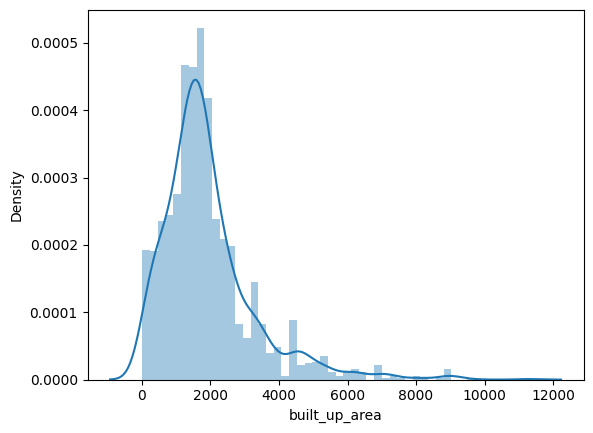

In [158]:
sns.distplot(df["built_up_area"], kde=True)

<Axes: >

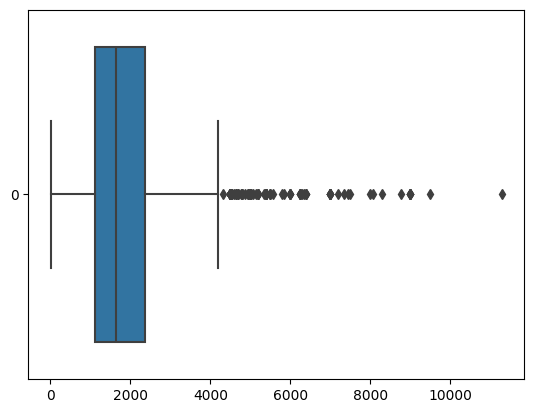

In [159]:
sns.boxplot(df["built_up_area"], orient='h')

### carpet_area

In [160]:
df["carpet_area"].isna().sum()

1791

In [161]:
df["carpet_area"].describe()

count     1922.000000
mean      1428.280738
std       1035.930613
min         15.000000
25%        831.240000
50%       1292.000000
75%       1762.000000
max      18122.000000
Name: carpet_area, dtype: float64

In [162]:
df[df["carpet_area"] > 10000]

property_type         society     sector  price  price_per_sqft     area  \
2131          flat      godrej air  sector 85    2.5          1379.0   1812.0   
2342          flat  m3m golfestate  sector 65   13.2         12000.0  11000.0   

                            areaWithType  bedRoom  bathroom balcony  floorNum  \
2131  Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0      3+      16.0   
2342  Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0       3      13.0   

          facing       agePossession  super_built_up_area  built_up_area  \
2131  North-East  Under Construction                  NaN            NaN   
2342       North      Moderately Old                  NaN            NaN   

      carpet_area  study room  servant room  store room  pooja room  others  \
2131      18122.0         1.0           0.0         0.0         1.0     1.0   
2342      11000.0         0.0           1.0         0.0         0.0     0.0   

      furnishing_type  luxury_score  
2131              1.0          44.0  
2342              0.0          60.0

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\1375982708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["carpet_area"], kde=True)


<Axes: xlabel='carpet_area', ylabel='Density'>

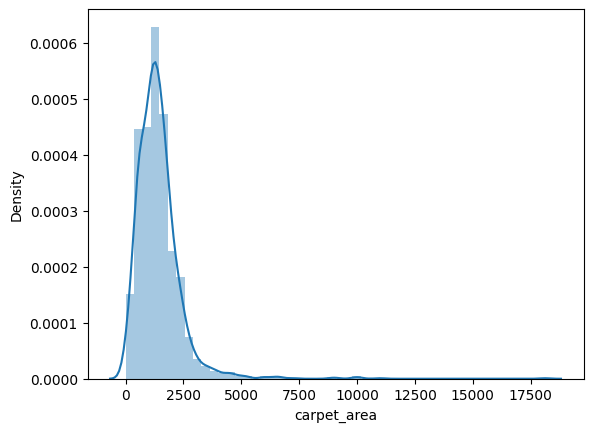

In [163]:
sns.distplot(df["carpet_area"], kde=True)

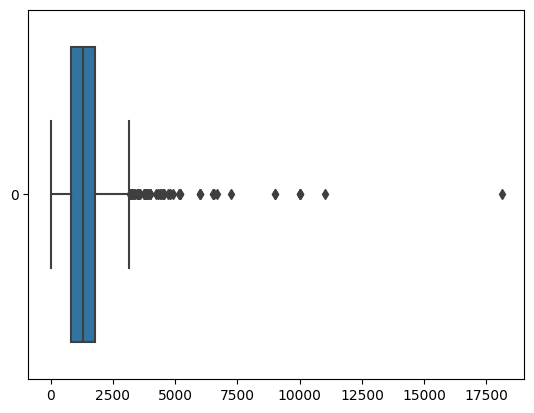

In [164]:
sns.boxplot(df["carpet_area"], orient='h');

In [165]:
df.loc[2131, "carpet_area"] = 1812

### luxury score

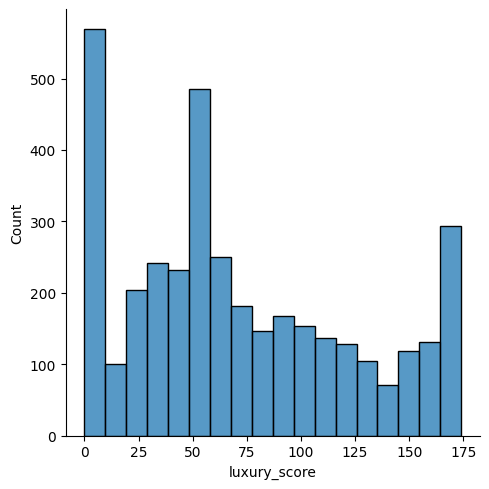

In [166]:
sns.displot(df["luxury_score"]);

<Axes: >

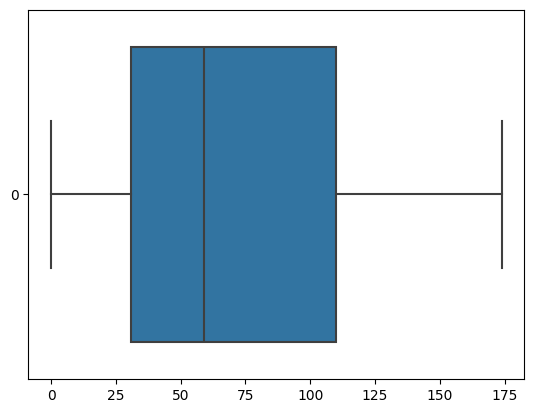

In [167]:
sns.boxplot(df["luxury_score"], orient='h')

### checking the price_per_sqft again

In [168]:
x = df[df["price_per_sqft"] <= 20000]
x.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   
5          flat               suncity avenue  sector 102   0.48   

   price_per_sqft    area                                       areaWithType  \
0          7585.0  1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0  1105.0                   Carpet area: 1103 (102.47 sq.m.)   
3          5470.0   585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0  1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   
5          9022.0   532.0  Super Built up area 632(58.71 sq.m.)Carpet are...   

   bedRoom  bathroom balcony  floorNum      facing   agePossession  \
0      3.0       2.0       2       2.0         NaN    New Property   
1      2.0       2.0       2       4.0         NaN    New Property   
3      2.0       2.0       1      17.0         NaN    New Property   
4      3.0       4.0      3+      10.0  North-West  Relatively New   
5      2.0       2.0       1       5.0  North-East  Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               1081.0            NaN        650.0         0.0           0.0   
1                  NaN            NaN       1103.0         1.0           1.0   
3                  NaN         1000.0        585.0         0.0           0.0   
4               1995.0         1615.0       1476.0         0.0           1.0   
5                632.0            NaN        532.0         0.0           0.0   

   store room  pooja room  others  furnishing_type  luxury_score  
0         0.0         0.0     0.0              0.0           8.0  
1         0.0         0.0     0.0              0.0          38.0  
3         0.0         0.0     0.0              0.0          49.0  
4         0.0         0.0     1.0              1.0         174.0  
5         1.0         0.0     0.0              0.0         159.0

In [169]:
# calculate the area to bedroom ratio (there are multiple room under a small area)
(x["area"]/x["bedRoom"]).quantile(0.05)

257.0

In [170]:
x[(x["area"]/x["bedRoom"]) < 250].sample(5)

property_type                    society      sector  price  \
2538          flat          gls arawali homes  sohna road   0.29   
575          house     huda ashok vihar phase    sector 4   0.70   
2832         house                independent    sector 9   0.60   
48           house  ganpati heights apartment   sector 13   1.25   
37           house                independent  sector 104   0.45   

      price_per_sqft    area  \
2538          6035.0   481.0   
575          10233.0   684.0   
2832         10753.0   558.0   
48             151.0  1035.0   
37           12162.0   370.0   

                                           areaWithType  bedRoom  bathroom  \
2538                  Carpet area: 480.53 (44.64 sq.m.)      2.0       2.0   
575                          Plot area 684(63.55 sq.m.)      3.0       2.0   
2832                          Plot area 62(51.84 sq.m.)      3.0       3.0   
48                         Plot area 115(7692.86 sq.m.)     10.0       6.0   
37    Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...      4.0       4.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
2538       2       9.0        East  Relatively New                  NaN   
575        1       2.0  North-East    New Property                  NaN   
2832       1       2.0         NaN  Relatively New                  NaN   
48         2       3.0  South-East    Old Property                  NaN   
37         2       4.0       North  Moderately Old                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
2538            NaN   480.500496         0.0           0.0         0.0   
575           684.0          NaN         1.0           0.0         0.0   
2832          558.0          NaN         0.0           0.0         0.0   
48            115.0          NaN         0.0           0.0         0.0   
37              NaN  1500.000000         0.0           0.0         0.0   

      pooja room  others  furnishing_type  luxury_score  
2538         0.0     0.0              0.0          55.0  
575          0.0     0.0              0.0           7.0  
2832         0.0     0.0              0.0           0.0  
48           0.0     1.0              0.0           7.0  
37           0.0     0.0              1.0           7.0

#### There is problem in these data points, as the number of bedrooms in such a small area is not possible 

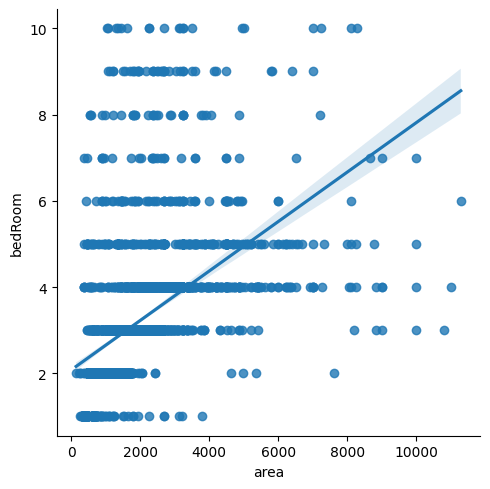

In [171]:
sns.lmplot(data=df, x="area", y="bedRoom");

In [172]:
df[df["area"]/df["bedRoom"] < 100]

property_type                          society      sector  price  \
37           house                      independent  sector 104   0.45   
229          house                        rk excelo   sector 12   0.60   
247          house                      independent    sector 7   0.89   
751          house                      independent   sector 17   0.32   
1429         house                    sector 38 rwa   sector 38   1.40   
1562         house                      independent    sector 6   0.50   
1580         house                      independent    sector 8   0.49   
1696         house                         ss omnia   sector 86   0.42   
1737         house            rajendra park gurgaon  sector 105   0.37   
1773         house                    rattan garden    sector 7   0.83   
1953         house                   not applicable    sector 4   0.51   
1997         house                        jacobpura   sector 12   0.53   
2047         house                            ansal   sector 43   1.85   
2300         house  ashok vihar phase iii extension    sector 5   0.40   
2360         house                      independent  sector 105   0.60   
2721         house                      independent    sector 5   0.50   
2784         house                      independent   sector 28   0.75   
3268         house                      independent    sector 9   0.42   
3306         house                      independent    sector 4   0.50   
3774         house                      independent   sector 28   0.45   

      price_per_sqft   area  \
37           12162.0  370.0   
229          13333.0  450.0   
247          18658.0  477.0   
751          22068.0  145.0   
1429         23932.0  585.0   
1562         13889.0  360.0   
1580         11250.0  436.0   
1696          9333.0  450.0   
1737         10277.0  360.0   
1773         17584.0  472.0   
1953         14167.0  360.0   
1997         14583.0  363.0   
2047         34259.0  540.0   
2300          8889.0  450.0   
2360         11102.0  540.0   
2721         11111.0  450.0   
2784         20833.0  360.0   
3268          9333.0  450.0   
3306         10482.0  477.0   
3774         10000.0  450.0   

                                           areaWithType  bedRoom  bathroom  \
37    Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...      4.0       4.0   
229   Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...      5.0       3.0   
247                          Plot area 477(44.31 sq.m.)      5.0       3.0   
751                    Built Up area: 145 (13.47 sq.m.)      2.0       2.0   
1429  Plot area 65(54.35 sq.m.)Built Up area: 62 sq....      8.0       8.0   
1562                          Plot area 40(33.45 sq.m.)      5.0       3.0   
1580                         Plot area 360(33.45 sq.m.)      6.0       3.0   
1696                           Plot area 50(4.65 sq.m.)      5.0       3.0   
1737                         Plot area 360(33.45 sq.m.)      4.0       3.0   
1773                     Carpet area: 472 (43.85 sq.m.)      5.0       3.0   
1953                          Plot area 40(33.45 sq.m.)      4.0       4.0   
1997                         Plot area 360(33.45 sq.m.)      4.0       4.0   
2047                           Plot area 60(5.57 sq.m.)      8.0       8.0   
2300                          Plot area 50(41.81 sq.m.)      7.0       4.0   
2360                          Plot area 60(50.17 sq.m.)      8.0       4.0   
2721                         Plot area 450(41.81 sq.m.)      5.0       3.0   
2784                          Plot area 40(33.45 sq.m.)      7.0       4.0   
3268                   Built Up area: 450 (41.81 sq.m.)      5.0       3.0   
3306                    Built Up area: 53 (44.31 sq.m.)      5.0       3.0   
3774                     Built Up area: 50 (4.65 sq.m.)      5.0       3.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
37         2       4.0       North  Moderately Old                  NaN   
229      

#### These points are cleary an outliers, so remove them 

In [173]:
df = df[df["area"]/df["bedRoom"] > 100]

In [175]:
outliers_df = df[((df["area"]/df["bedRoom"]) < 250) & (df["bedRoom"] > 3)]

#### found that the above data points are outliers, but considering the number of floors we can calculate the number of bedroom per floor.

In [179]:
outliers_df["bedRoom"] = round(outliers_df["bedRoom"]/outliers_df["floorNum"])

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17400\1695430542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df["bedRoom"] = round(outliers_df["bedRoom"]/outliers_df["floorNum"])


In [182]:
outliers_df

property_type                                 society             sector  \
9            house                             independent         sector 105   
15           house                             independent          sector 12   
48           house               ganpati heights apartment          sector 13   
74           house                             independent          sector 25   
93           house                             independent         sector 105   
99           house                             independent           sector 4   
140          house                             independent          sector 28   
186          house                             independent          sector 13   
255          house                          uppal southend          sector 49   
293          house                          sector 57 huda          sector 57   
343          house                           sector 38 rwa          sector 38   
387          house                             independent          sector 12   
393          house                             independent           sector 2   
521          house                             independent           sector 4   
530          house                         sheetla enclave           sector 5   
540          house                             independent          sector 45   
565          house                 iffco nagar and 17b rwa          sector 17   
668          house                             independent           sector 2   
753          house                                shivpuri           sector 7   
837          house                             independent         sector 105   
848          house                             independent           sector 8   
852          house                             independent         sohna road   
880          house                             independent          sector 10   
886          house                             independent           sector 4   
935          house                             independent           sector 4   
1033         house                             independent          sector 24   
1049         house                             independent          sector 21   
1087         house                             independent          sector 47   
1106         house                             independent           sector 5   
1167         house                             independent          sector 13   
1187         house                             independent          sector 47   
1206         house                             independent           sector 7   
1213         house                             independent           sector 6   
1224         house                             independent           sector 6   
1384         house                             independent           sector 3   
1407         house     palam vihar extension west zone rwa           sector 2   
1477         house                             independent           sector 3   
1480         house                              huda floor          sector 38   
1500         house                             independent          sector 12   
1509         house                             independent          sector 55   
1524         house                           rattan garden           sector 7   
1532         house                             independent         sohna road   
1537         house                             independent           sector 8   
1627         house                             independent         sector 105   
1747         house                             independent          sector 12   
1798         house                             independent          sector 12   
1851         house                             independent          sector 47   
1936         house                             independent          sector 11   
1939         house                  

In [183]:
# update the original dataframe 
df.update(outliers_df)

In [194]:
# now calculate the area to bedroom ratio 
df[(df["area"]/df["bedRoom"] < 250) & (df["bedRoom"] > 4)]

property_type               society      sector  price  price_per_sqft  \
93           house           independent  sector 105   1.10         12222.0   
387          house           independent   sector 12   0.65          6500.0   
753          house              shivpuri    sector 7   2.80         12444.0   
1106         house           independent    sector 5   0.85          9444.0   
1206         house           independent    sector 7   1.16         11717.0   
1747         house           independent   sector 12   2.50         13888.0   
1936         house           independent   sector 11   3.50         15555.0   
1939         house           independent     manesar   1.10          6172.0   
2806         house           independent    sector 2   0.98          9074.0   
3148         house  bhim nagar, sector 6    sector 6   0.85         14096.0   
3246         house           independent     manesar   0.80          6666.0   
3329         house           independent    sector 5   1.10         10000.0   
3633         house           independent   sector 17   0.32          5664.0   

        area                                       areaWithType  bedRoom  \
93     900.0                     Carpet area: 900 (83.61 sq.m.)      6.0   
387   1000.0                     Carpet area: 1000 (92.9 sq.m.)      6.0   
753   2250.0                       Plot area 2250(209.03 sq.m.)     10.0   
1106   900.0                     Carpet area: 900 (83.61 sq.m.)      5.0   
1206   990.0                     Carpet area: 110 (91.97 sq.m.)      5.0   
1747  1800.0                       Plot area 1800(167.23 sq.m.)      9.0   
1936  2250.0                 Built Up area: 2250 (209.03 sq.m.)     10.0   
1939  1782.0                       Plot area 1782(165.55 sq.m.)      8.0   
2806  1080.0                    Carpet area: 120 (100.34 sq.m.)      9.0   
3148   603.0                           Plot area 67(6.22 sq.m.)      5.0   
3246  1200.0                       Plot area 1200(111.48 sq.m.)      8.0   
3329  1100.0  Built Up area: 1100 (102.19 sq.m.)Carpet area:...      5.0   
3633   565.0                   Built Up area: 565 (52.49 sq.m.)      5.0   

      bathroom balcony  floorNum      facing   agePossession  \
93         4.0       1       1.0  South-West       Undefined   
387        2.0       3       1.0         NaN       Undefined   
753        7.0       3       1.0         NaN    Old Property   
1106       3.0       3       1.0         NaN       Undefined   
1206       4.0       2       1.0  North-East       Undefined   
1747       5.0       2       1.0  South-East    Old Property   
1936       1.0       0       1.0         NaN    New Property   
1939       8.0       0       1.0         NaN    New Property   
2806       4.0       3       1.0       South       Undefined   
3148       2.0       2       1.0         NaN    Old Property   
3246       8.0       2       1.0         NaN  Relatively New   
3329       4.0       2       1.0        East       Undefined   
3633       1.0       0       1.0         NaN       Undefined   

      super_built_up_area  built_up_area  carpet_area  study room  \
93                    NaN            NaN        900.0         0.0   
387                   NaN            NaN       1000.0         0.0   
753                   NaN         2250.0          NaN         1.0   
1106                  NaN            NaN        900.0         0.0   
1206                  NaN            NaN        110.0         0.0   
1747                  NaN         1800.0          NaN         0.0   
1936                  NaN         2250.0          NaN         0.0   
1939                  NaN         1782.0          NaN         0.0   
2806                  NaN            NaN        120.0         0.0   
3148                  NaN           67.0          NaN         0.0   
3246                  NaN         1200.0          NaN         0.0   
3329                  NaN         1100.0        900.0         0.0   
3633                  NaN          565.

#### drop these rows 

In [200]:
df = df[~((df["area"]/df["bedRoom"] < 250) & (df["bedRoom"] > 4))]

In [201]:
df.shape

(3680, 23)

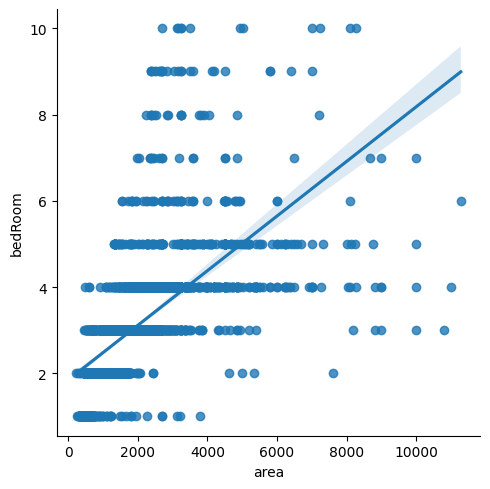

In [203]:
sns.lmplot(data=df, x="area", y="bedRoom");

In [205]:
df.to_csv("gurgaon_outliers_treated.csv", index=False)